# Dataset Exploration Ford GoBikes (Part 1/2)
#### by Dirk Kadijk


## Table of Contents

 1. Introduction
 2. Data Gathering
 3. Data Assessing
 4. Data Cleaning
 5. Exploration Data Analysis (EDA)
    - Univariate
    - Bivariate  
    - Multivariate
 6. Conclusions
 
<br><br>
# 1. Introduction  

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process which is as Capstone project part of the Udacity Data Analysis Nanodegree course.

In this part (1/2) I will use Python visualization libraries to systematically wrangle and explore a `2017-fordgobike-tripdata` datafile, starting from plots of single variables and building up to plots of multiple variables.

In the following second part of the project (2/2), I will produce a short presentation that illustrates interesting properties, trends, and relationships that I discovered in the selected (cleaned) dataset. (based on another file `2017-fordgobike-tripdata_clean` which is output of this project part 1.





## 1.1. Dataset and its origin

Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. 

On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to [Bay Wheels](https://www.lyft.com/bikes/bay-wheels) in June 2019.  The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.



The Dataset consists of information regarding 519.700 bike trips, including its timing and geolocation of the start and end of each trip. The dataset `2017-fordgobike-tripdata.csv` can be found in the download [here](https://www.lyft.com/bikes/bay-wheels/system-data).
Each trip is anonymized and includes:

- Trip
- Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


### 1.2. Research questions 


#### What is the structure of your dataset?

There are 519.700 bike trips and all data in single table `gobikes_clean`

### What is/are the main feature(s) of interest in your dataset?

- When are most trips taken, in term of hour of the day or day of the week? And how does this differ between Customers and Subscribers?

- Does the average duration of bike trip depend on whether a user is a Subscriber or Customer?

- What bike stations are the most popular destination? And does it differ much dependent upon user_type?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- user_type
- trip_duration
- end_station_name
- start_time

<br><br>
# 2. Data Gathering

<br><br>
# 3. Data Assessing

In [831]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')
%matplotlib inline

In [832]:
import warnings
warnings.filterwarnings('ignore')

In [833]:
gobikes = pd.read_csv('2017-fordgobike-tripdata.csv')

In [834]:
gobikes.shape

(519700, 13)

In [835]:
gobikes['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
                                                             ...  
Pierce Ave at Market St                                          7
Harmon St at Adeline St                                          4
Jackson St at 11th St                                            3
Ellsworth St at Russell St                                       2
Empire St at 1st St                                              2
Name: end_station_name, Length: 272, dtype: int64

In [836]:
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [837]:
# no null values:
gobikes.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [838]:
# start_time has the wrong dataformat:
type(gobikes['start_time'][0])

str

In [839]:
# no duplicates
gobikes.duplicated().sum()

0

In [840]:
gobikes.bike_id.duplicated().sum()

516027

<br><br>
### Summary of identified Quality and Tidiness issues

##### Quality issues

- A. starttime and endtime have the wrong datatype string (in stead of datetime)
- B. start_station_id has wong datatype int64 (in stead of str)
- C. user_type has wrong datatype string (in stead of categorical)

##### Tidiness issues

- non

<br><br>
# 4. Data Cleaning

We clean based on 4 Data Quality Dimensions. Data quality dimensions help guide your thought process while assessing and also cleaning. 

The four main data quality dimensions are:

* **Completeness**: (PRIO1)  do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
* **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables). E.g. Zipcode not 5 digits
* **Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.  
* **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.



Let us first make a copie of the dataframe before cleaning:

In [841]:
# first make copy of dataframes before cleaning
gobikes_clean = gobikes.copy()

<br><br>
`issue A. Starttime and endtime have the wrong datatype string`

#### Define

convert to datatype 'datetime64' via the to_datetime function

#### Code

In [842]:
gobikes_clean['start_time'] = pd.to_datetime(gobikes_clean['start_time'])
gobikes_clean['end_time'] = pd.to_datetime(gobikes_clean['end_time'])

#### Test

In [843]:
# start_time has the wrong dataformat:
type(gobikes_clean['start_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [844]:
gobikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

<br><br>`issue B. start_station_id has wrong datatype int64 (in stead of str)`

#### Define

convert start_station_id to 'string' datatype via astype function

#### Code

In [845]:
gobikes_clean['start_station_id'] = gobikes_clean['start_station_id'].apply(str)


#### Test

In [846]:
# start_time has the wrong dataformat:
type(gobikes_clean['start_station_id'][0])

str

<br><br>
`issue C. user_type has wrong datatype string (in stead of categorical)`

#### Define

convert user_type datatype string to categorical  

#### Code

In [847]:
gobikes_clean['user_type'] = gobikes_clean['user_type'].astype('category')

#### Test

In [848]:
gobikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

Convert to specified date formats via .dt.strftime function [more info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html?highlight=dt%20strftime#pandas.Series.dt.strftime).

In [849]:
# Extract minute,day,week,month from the start_time
gobikes_clean['duration_min'] = gobikes_clean['duration_sec']/60

gobikes_clean['start_date'] = gobikes_clean.start_time.dt.strftime('%Y-%m-%d')
gobikes_clean['start_hour_of_day'] = gobikes_clean.start_time.dt.strftime('%H')
gobikes_clean['start_day_of_week'] = gobikes_clean.start_time.dt.strftime('%A')
gobikes_clean['start_month'] = gobikes_clean.start_time.dt.strftime('%b')
gobikes_clean.head(2)

gobikes_clean['year_month'] = gobikes_clean['start_time'].dt.to_period('M')

In [850]:
type(gobikes_clean['start_date'][0])

str

In [851]:
gobikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [852]:
gobikes_clean.start_month.value_counts()

Oct    108937
Sep     98558
Nov     95612
Dec     86539
Aug     83292
Jul     44073
Jun      2689
Name: start_month, dtype: int64

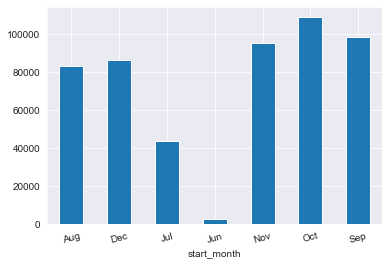

In [853]:
gobikes_clean.groupby(['start_month']) ['start_month'].count().plot(kind='bar');
plt.xticks(rotation=15);

In [854]:
gobikes_clean.start_day_of_week.value_counts()

Tuesday      87865
Wednesday    87752
Thursday     85243
Monday       81410
Friday       81165
Saturday     50874
Sunday       45391
Name: start_day_of_week, dtype: int64

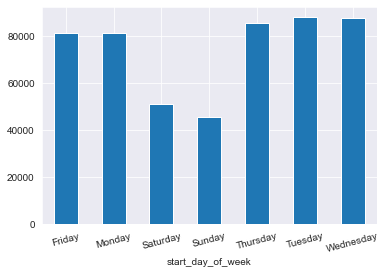

In [855]:
gobikes_clean.groupby(['start_day_of_week']) ['start_day_of_week'].count().plot(kind='bar');
plt.xticks(rotation=15);

#### Export of cleaned dataframe to a .csv file:

In [856]:
# save the cleaned data to csv file
gobikes_clean.to_csv('fordgobike-tripdata_clean.csv',index=None)

In [857]:
main = pd.read_csv('fordgobike-tripdata_clean.csv')
main = gobikes_clean
main.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335.166667,2017-12-31,16,Sunday,Dec,2017-12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313.333333,2017-12-31,15,Sunday,Dec,2017-12
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762.800000,2017-12-31,22,Sunday,Dec,2017-12
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036.200000,2017-12-31,17,Sunday,Dec,2017-12
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726.716667,2017-12-31,14,Sunday,Dec,2017-12


In [858]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

##### And the 'main' dataframe has these additional variables:

   -  duration_min : duration of biketrip in minute unit
   -  start_date: date of start of biketrip
   -  start_hour_of_day: hour of start of biketrip
   -  start_day_of_week: day of week of start of biketrip
   -  start_month: month of start of biketrip


<br><br>
# 5. Explorative Data Analysis (EDA)

The analysis in this chapter is structured, going from exploration of simple univariate relationships, to bivariate relationships, up through multivariate relationships.


## 5.1. Univariate Exploration

In this section, we investigate distributions of individual variables. If we see unusual points or outliers, we take a deeper look to clean things up
and prepare ourself to look at relationships between variables.

In [859]:
main.start_time.min(), main.start_time.max()

(Timestamp('2017-06-28 09:47:36.347000'),
 Timestamp('2017-12-31 23:59:01.261000'))

In [860]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [861]:
main.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration_min
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,18.316825
std,3444.146451,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,57.402441
min,61.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1.016667
25%,382.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,6.366667
50%,596.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,9.933333
75%,938.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,15.633333
max,86369.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1439.483333


#### TRIP DURATION

In [862]:
print ('The maximum duration of bike trip has extremely high value:' , main.duration_min.max(), 'minutes.')

The maximum duration of bike trip has extremely high value: 1439.4833333333333 minutes.


Looking into the distribution of of bike trips, it's clearly skewed to right.  The histograms tells that the bulk of the rides do not take longer than 30-60 minutes. 


Text(0.5, 1.0, 'Distribution of bike trip duration')

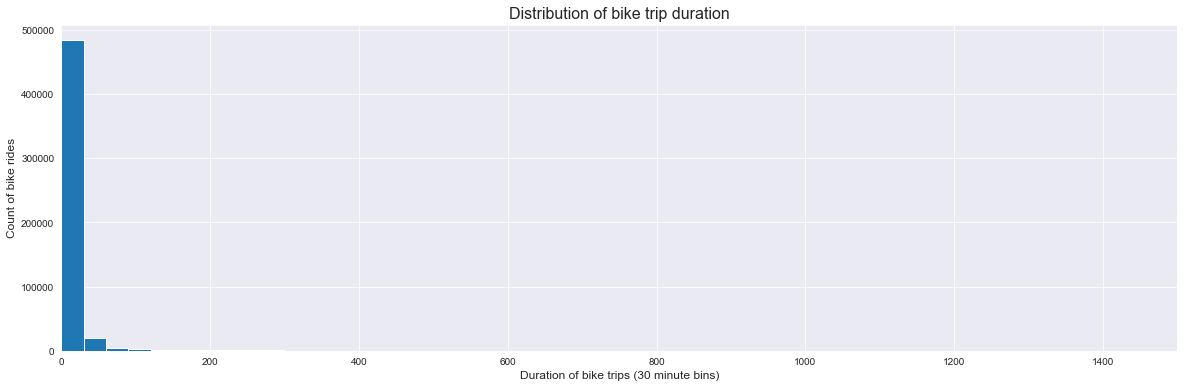

In [863]:
bins = np.arange(0, main.duration_min.max(0)+1, 30)
plt.figure(figsize=(20,6))
plt.hist(data=main, x='duration_min', bins=bins)
plt.xlim((0,1500))
plt.ylabel('Count of bike rides', fontsize=12)
plt.xlabel('Duration of bike trips (30 minute bins)', fontsize=12);
plt.title('Distribution of bike trip duration', fontsize=16)

In [864]:
#duration_sec Median
print('The median of the distribution is', main.duration_sec.median(), 'seconds')

The median of the distribution is 596.0 seconds


In [865]:
#modus is 357 seconds
main.duration_sec.mode()

0    357
dtype: int64

At the other end you also a signifant number of rides taking longer than 200 minutes.

In [866]:
print('This concerns', main.query('duration_min >= 200').shape[0] / main.shape[0], 'of the rides:')

This concerns 0.009366942466807774 of the rides:


(0.0, 1000.0)

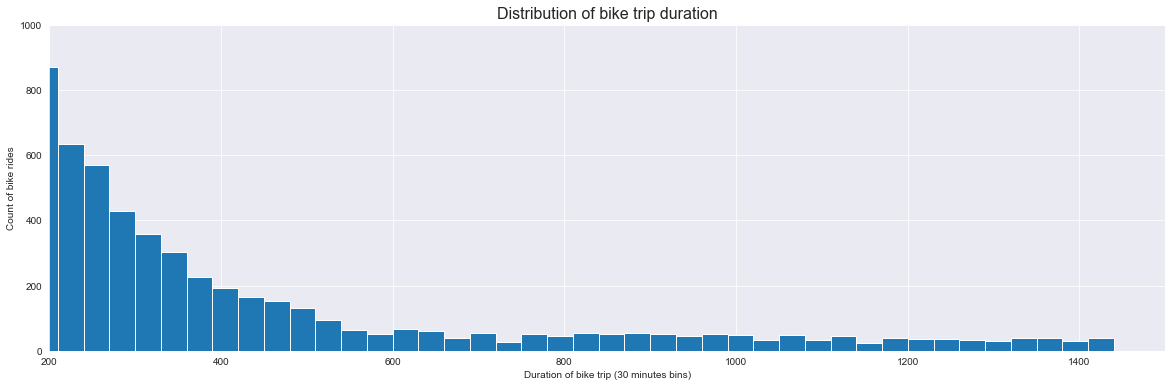

In [867]:
bins = np.arange(0, main.duration_min.max(0)+1, 30)
plt.figure(figsize=(20,6))
plt.hist(data=main, x='duration_min', bins=bins)
plt.title('Distribution of bike trip duration', fontsize=16)
plt.ylabel('Count of bike rides')
plt.xlabel('Duration of bike trip (30 minutes bins)')
plt.xlim((200,1500))
plt.ylim((0,1000))

<br><br>
#### CLEAN OUTLIERS IN THE TRIP duration_min DISTRIBUTION

Let's start to cut the outliers for safety; we will do this via a robust sigma-clipping operation:

In [868]:
quartiles = np.percentile(main['duration_min'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

6.857333333333332

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution (You can learn more about sigma-clipping operations in a book which author Jake VanderPlas coauthored with Željko Ivezić, Andrew J. Connolly, and Alexander Gray: ["Statistics, Data Mining, and Machine Learning in Astronomy"](http://press.princeton.edu/titles/10159.html) (Princeton University Press, 2014)).

With this we can use the ``query()`` method to filter-out rows with a bike ride duration outside these values:

In [869]:
main_new = main.query('(duration_min > @mu - 5 * @sig) & (duration_min < @mu + 5 * @sig)')

In [870]:
main_new.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration_min
count,498569.000000,498569.000000,498569.000000,498569.000000,498569.000000,498569.000000,498569.000000,498569.000000
mean,688.302046,37.771752,-122.364366,91.906717,37.771899,-122.363603,1676.540367,11.471701
std,441.280730,0.085569,0.104834,84.239204,0.085474,0.104354,971.973974,7.354679
min,61.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1.016667
25%,374.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,791.000000,6.233333
50%,576.000000,37.782411,-122.398870,66.000000,37.783521,-122.398525,1734.000000,9.600000
75%,878.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2525.000000,14.633333
max,2653.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,44.216667


In [871]:
main_new.duration_min.max()

44.21666666666667

In [872]:
main.shape[0], main_new.shape[0], main.shape[0] - main_new.shape[0]

(519700, 498569, 21131)

In [873]:
print('So we have dropped', main.shape[0] - main_new.shape[0], 'rows of bike rides with a duration longer than', main_new.duration_min.max(), 'minutes.')


So we have dropped 21131 rows of bike rides with a duration longer than 44.21666666666667 minutes.


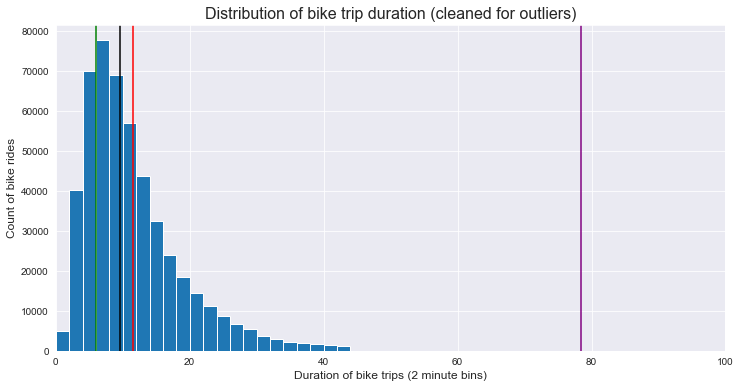

In [874]:
graph = main_new.duration_min
bins = np.arange(0, main_new.duration_min.max(0)+1, 2)
plt.figure(figsize=(12,6))
plt.hist(data=main_new, x='duration_min', bins=bins)
plt.xlim((0,100))

plt.ylabel('Count of bike rides', fontsize=12)
plt.xlabel('Duration of bike trips (2 minute bins)', fontsize=12);
plt.title('Distribution of bike trip duration (cleaned for outliers)', fontsize=16);

import statistics
plt.axvline(statistics.mean(graph),color='red');
plt.axvline(statistics.mode(graph),color='green');
plt.axvline(statistics.median(graph),color='black');
plt.axvline(78.5, color='purple');

- In plot above you see bike trip distribution which is still very right skewed. The cut off point for the `main_new dataframe` is the purple line.

<BR><BR>
#### DISTRIBUTIONS OF TRIP DURATION ON RESPECTIVELY MONTH, DAY_OF_WEEK AND HOUR LEVEL

In figure below we we a strong growth between June and Oct 2017. After October the usage leveled off and it interesting to explore why (maybe because of weather or competition?):

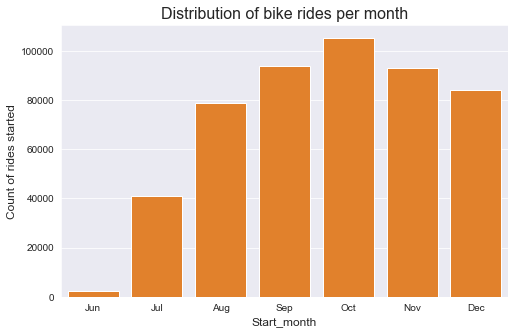

In [875]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

month_ranked = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month_ranked)
main_new['start_month'] = main_new['start_month'].astype(monthcat)

sb.countplot(data=main_new, x='start_month', color=base_color)
plt.xlabel('Start_month', fontsize=12)
plt.ylabel('Count of rides started', fontsize=12)
plt.title('Distribution of bike rides per month', fontsize=16);


<br><br>Here we see that number of bike trips is on similar level during weekday, but sinks to an about 50% lower level during the weekend:

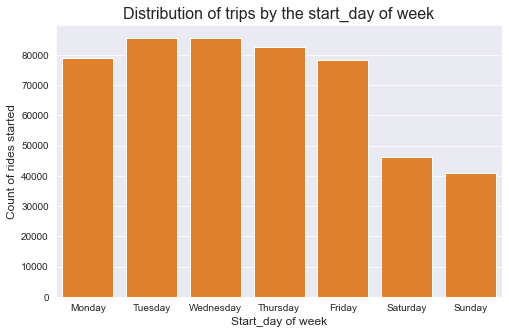

In [876]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
main_new['start_day_of_week'] = main_new['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=main_new, x='start_day_of_week', color=base_color)
plt.xlabel('Start_day of week', fontsize=12)
plt.ylabel('Count of rides started', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


<br><br>Here we learn that that the distribution of starting a bike trip has a bimodal distribution: 



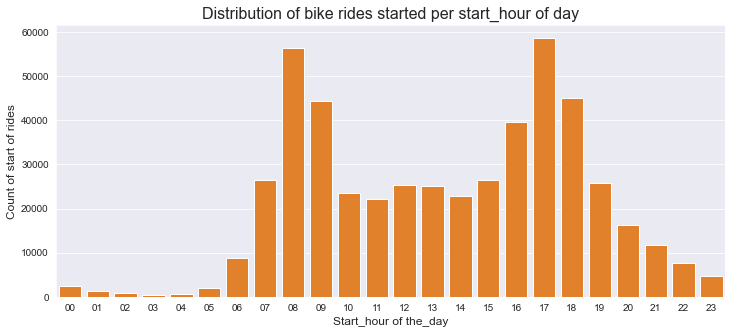

In [877]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[1]
sb.countplot(data=main_new, x='start_hour_of_day', color=base_color)
plt.xlabel('Start_hour of the_day', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title('Distribution of bike rides started per start_hour of day', fontsize=16);


- The most busy hour is 5 PM, second busy hour is 8 AM. The busy hours are 7-9 AM in morning and 16-18PM in the evening. This time is common commuting time.
- There is clearly a high number of bike trips during the peak hours when people go to school or work or they commute from it to home. This makes sense since during the weekends less people have to go to work or study as they do during the workweek.
- It will be interesting to find out how this distribution is different between weekdays and the weekend.

<br><br>
#### DISTRIBUTION OF TRIP DURATION ON WEEKLY LEVEL based on 'resample' method

To determine the plot on 'weekly level' we use the `resample method` which is a data aggregation method based on timedata with the datetime64 dataformat (see pg 198 and 204 of The Python Data Science Handbook by Jake VanderPlas).

In [878]:
main_new.start_time.min()

Timestamp('2017-06-28 09:47:36.347000')

In [879]:
# first we need set the index based on the start_time:
aap = main_new.set_index('start_time', inplace=False)
aap.head(2)

,duration_sec,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
start_time,,,,,,,,,,,,,,,,,,
2017-12-31 23:52:55.581,2183,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,36.383333,2017-12-31,23,Sunday,Dec,2017-12
2017-12-31 23:52:55.937,2170,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,3717,Subscriber,36.166667,2017-12-31,23,Sunday,Dec,2017-12


In [880]:
# with the resample function we first aggregate data to weekly level

weekly = aap.resample('W-SAT').count()                # W-SUN is the split-point of th weekly frequency, so it aggregates usage on this Saturday plus 6 days before
weekly.head(2)

,duration_sec,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
start_time,,,,,,,,,,,,,,,,,,
2017-07-01,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912,2912
2017-07-08,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338,5338


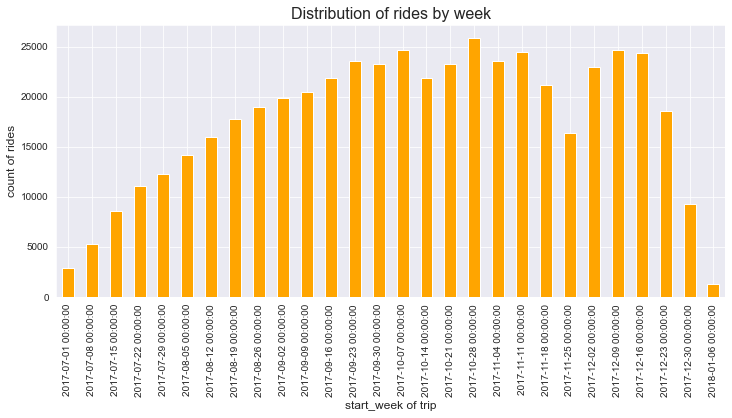

In [881]:
plt.figure(figsize=(12,5))
weekly.duration_min.plot(kind='bar', color='orange')
plt.xlabel('start_week of trip', fontsize=12)
plt.ylabel('count of rides', fontsize=12)
plt.title('Distribution of rides by week', fontsize=16);

# Note: resample report the average of the previous week before the date in the xtick-label.

- The plot above shows a pretty constant weekly growth with an outlying low number of bike rides in the week with SAT on '2017-11-26' plus the last 2 weeks in the series.

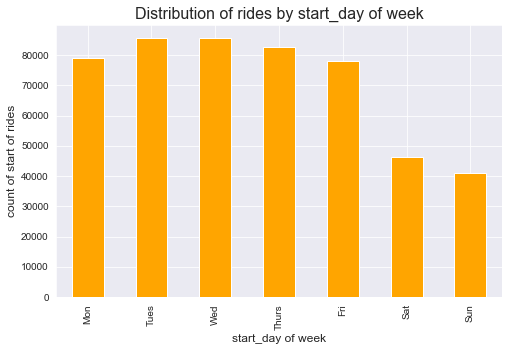

In [882]:
# Note: see here alternative method to generate plot of distribution on weekly level, but now based on date as index via set_index in aap-dataframe (see pg 207 Jake):

plt.figure(figsize=(8,5))    

by_weekday = aap.duration_sec.groupby(aap.index.dayofweek).count()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'], kind='bar', color='orange')
plt.xlabel('start_day of week', fontsize=12)
plt.ylabel('count of start of rides', fontsize=12)
plt.title('Distribution of rides by start_day of week', fontsize=16);

- You see that this plot looks the same as the plot generated in the former paragraph.

<br><br>
#### DISTRIBUTION OF user_type:

In [883]:
main.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

Almost 80% of users are subscribers:

In [884]:
main.user_type.value_counts() / main.shape[0]

Subscriber    0.787435
Customer      0.212565
Name: user_type, dtype: float64

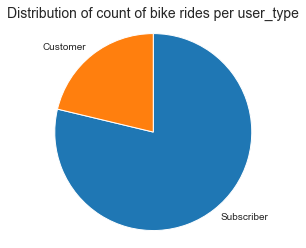

In [957]:
# distribution via pie chart
sorted_counts = main['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.title('Distribution of count of bike rides per user_type', fontsize=14);

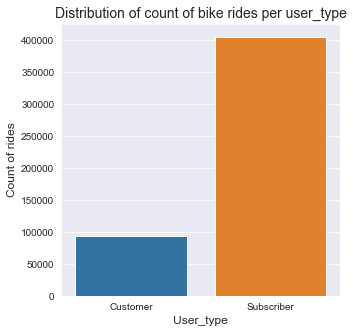

In [961]:
# same distribution in countplot format
plt.figure(figsize=(5,5))

sb.countplot(data=main_new, x='user_type')
plt.xlabel('User_type', fontsize=12)
plt.ylabel('Count of rides', fontsize=12)
plt.title('Distribution of count of bike rides per user_type', fontsize=14);


####  DISTRIBUTION OF COUNT OF TRIPS TO FAVORITE end_station_names

In [887]:
# let us limit to the top 10 destinations:
top_dest = main_new['end_station_name'].value_counts().index[:10]

In [888]:
# here we create dataframe with trips only to top 10 destinations
top_dest_df = main_new.loc[main_new['end_station_name'].isin(top_dest)]
top_dest_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_date,start_hour_of_day,start_day_of_week,start_month,year_month
354576,637,2017-09-12 17:42:43.321,2017-09-12 17:53:20.543,9,Broadway at Battery St,37.798572,-122.400869,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,2399,Customer,10.616667,2017-09-12,17,Tuesday,Sep,2017-09
237071,716,2017-10-16 18:43:45.456,2017-10-16 18:55:42.430,47,4th St at Harrison St,37.780955,-122.399749,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3104,Subscriber,11.933333,2017-10-16,18,Monday,Oct,2017-10
211867,664,2017-10-24 06:46:52.307,2017-10-24 06:57:56.411,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1601,Subscriber,11.066667,2017-10-24,06,Tuesday,Oct,2017-10
145957,554,2017-11-10 18:00:09.293,2017-11-10 18:09:23.339,19,Post St at Kearny St,37.788975,-122.403452,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2029,Subscriber,9.233333,2017-11-10,18,Friday,Nov,2017-11
415587,1515,2017-08-23 14:32:15.738,2017-08-23 14:57:31.576,109,17th St at Valencia St,37.763316,-122.421904,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,692,Customer,25.250000,2017-08-23,14,Wednesday,Aug,2017-08


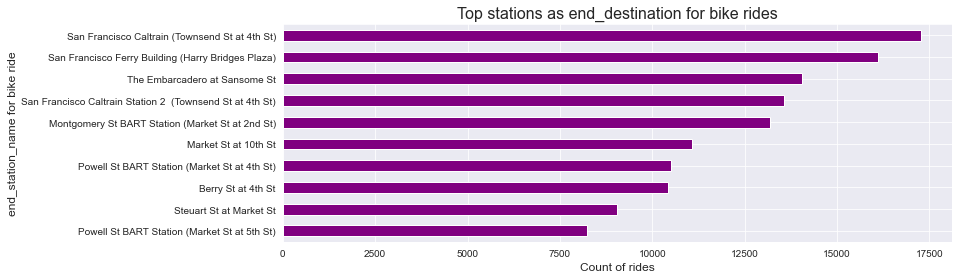

In [889]:
plt.figure(figsize=(12,4))
sb.set_style('darkgrid')
top_dest_df['end_station_name'].value_counts().sort_values(ascending=True).plot(kind='barh', color='purple');
plt.title('Top stations as end_destination for bike rides', fontsize=16)
plt.xlabel('Count of rides', fontsize=12)
plt.ylabel('end_station_name for bike ride', fontsize=12);

#### LET US HAVE A LOOK AT WHAT THE PROFILE IS OF THE 'OUTLIER GROUP' (>44 MINUTES) TO DETECT PATTERNS AND ODDITIES

Earlier in this section we considered bike rides > 44 minutes as outliers and cut off all observations > 44 minutes. This defined the dataframe `main_new`.

Let us now analyse the sample of bike rides based on a Z-score between 5 and 10 standard deviations to analyse how the profile of this 'OUTLIER' group. This creates the dataframe `main_outliergroup`.  


In [890]:
main_outliergroup = main.query('(duration_min > @mu - 10 * @sig) & (duration_min < @mu + 10 * @sig)')

In [891]:
# Let's have a look at the outliers in duration_min
outliers = main_outliergroup.query('duration_min >= 44')
outliers.shape

(8560, 19)

In [892]:
outliers.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,duration_min
count,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000,8560.000000
mean,3493.487500,37.765612,-122.342540,107.037033,37.767279,-122.343967,1600.168575,58.224792
std,604.561674,0.111346,0.129832,101.300843,0.111708,0.130405,943.043180,10.076028
min,2640.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,11.000000,44.000000
25%,2957.000000,37.775880,-122.408915,15.000000,37.775880,-122.408915,765.000000,49.283333
50%,3395.000000,37.788300,-122.398525,70.000000,37.791858,-122.400811,1607.000000,56.583333
75%,3998.000000,37.801319,-122.272009,191.000000,37.804770,-122.272080,2400.000000,66.633333
max,4710.000000,37.880222,-121.874119,338.000000,37.880222,-121.874119,3730.000000,78.500000


- In the describe table you find that this OUTLIER GROUP comprises 8560 trips with a maximum bike ride duration of 78.5 minutes (=44 + 5 times std) and a minium of 44 minutes.

Let us now look at the profile of this group in more detail:


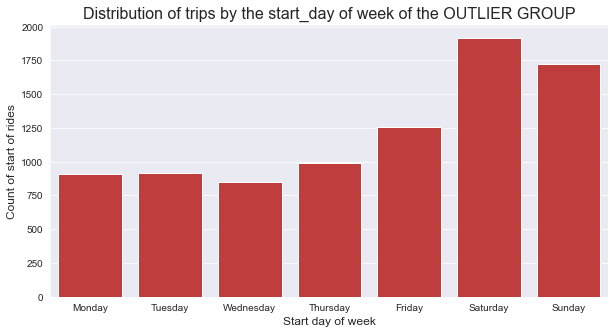

In [967]:
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[3]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
outliers['start_day_of_week'] = outliers['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=outliers, x='start_day_of_week', color=base_color)
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week of the OUTLIER GROUP", fontsize=16);


- It shows that people spend have longer bike trips during weekends. It will be interesting to reseach the share of Customers vs Subscribers.

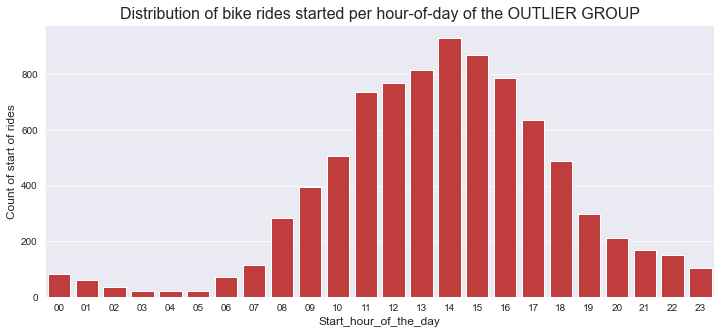

In [968]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[3]
sb.countplot(data=outliers, x='start_hour_of_day', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title('Distribution of bike rides started per hour-of-day of the OUTLIER GROUP', fontsize=16);


- This OUTLIER GROUP has a clear single-modal distribution: The most busy hour is 14 PM, The busy hours are between 11 and 5.00 o'clock. 
- The OUTLIER GROUP does typically not use a bike for commuting to work.. since we found earlier that their busy hours are 7-9 AM in morning and 4PM-6PM in the evening.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The distribution of number of bike trips has risen steeply in the period Jun-Nov 2017 (from 2500 in June to a top of 102.000 rides in month Nov 2017).
- We see that during weekdays the number of trips is somewhat the double during the weekend.
- Further we learned that that the distribution of starting a bike trip is bimodal: most trips start between 8-9 or between 17-18 o'clock. 


#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- We converted several variables to a correct datatype (start_time, end_time, start_station_id, user_type). And created several additional variables (start_date, start_hour, start_day_of_week, start_month, start_week) to be able to create plots with different time resolutions.

- The bike trip duration had outliers of more than 12 hours up to 24 hours (1440 minutes). For safety and to enable bi- and multivariate exploration the outliers were removed from the dataset via a sigma-clipping operation to move forwards. We cut off all observations with duration_min > 44 minutes.

- Finally we had a deeper look into the OUTLIER GROUP (=bike riders riding >44 minutes and less than 78 minutes per trip). It shows that this group do long bike trips especially during weekends. Plus their busy hours for starting a bike trip are between 11 and 5.00 o'clock. So the OUTLIER GROUP does typically not use a bike for commuting to work.. 



It will be interesting to find out how the distribution is different between weekdays and the weekend between Customers and Subscribers. Plus to find out how the distribution of bike rides over the day is different between Customers and Subscribers; it might well be that Customers have another distribution than the above mentioned bimodal distribution since they are not bound to office hours..


<br><br>
## 5.2. Bivariate Exploration

In this section, we investigate relationships between pairs of variables in our data.

#### EXPLORE RELATIONSHIP BETWEEN duration_min OF BIKE TRIPS AND user_type

Let's first compare the histogram distribution of each user_type:

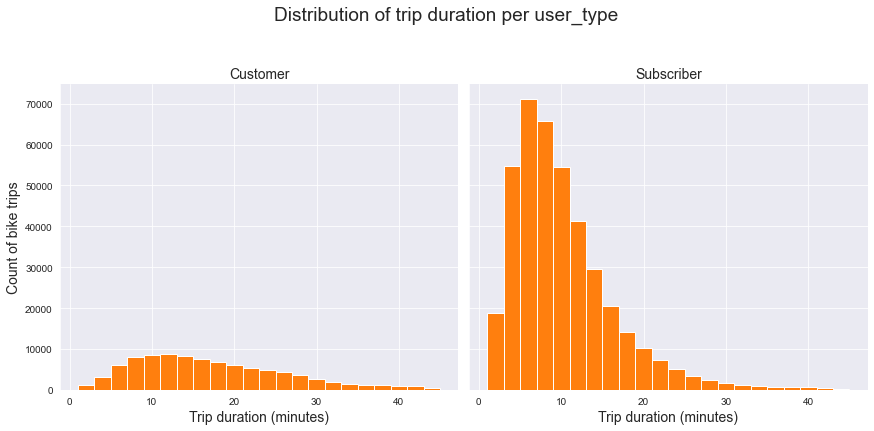

In [952]:
# plotting

g = sb.FacetGrid(data = main_new, col = 'user_type', col_wrap = 2, height = 6)
base_color = sb.color_palette()[1]

g.map(plt.hist, 'duration_min', bins = np.arange(main_new['duration_min'].min(), main_new['duration_min'].max()+1, 2), color = base_color)
g.set_ylabels('Count of bike trips', size=14)
g.set_xlabels('Trip duration (minutes)', size=14)
g.set_titles('{col_name}', size=14);

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of trip duration per user_type', fontsize=19);

- The 2 distributions above tell that Subscribers typically have shorter bike trips (with quite high mode in the bin 6-8 minutes)

<br><br>
#### LET US ANALYSE AND COMPARE THE DISTRIBUTION OF TRIP DURATION BETWEEN user_types IN MORE DETAIL

We create a barplot, a violinplot and a boxplot to analyse the relationship between 'duration_min' of trip and 'user_type':

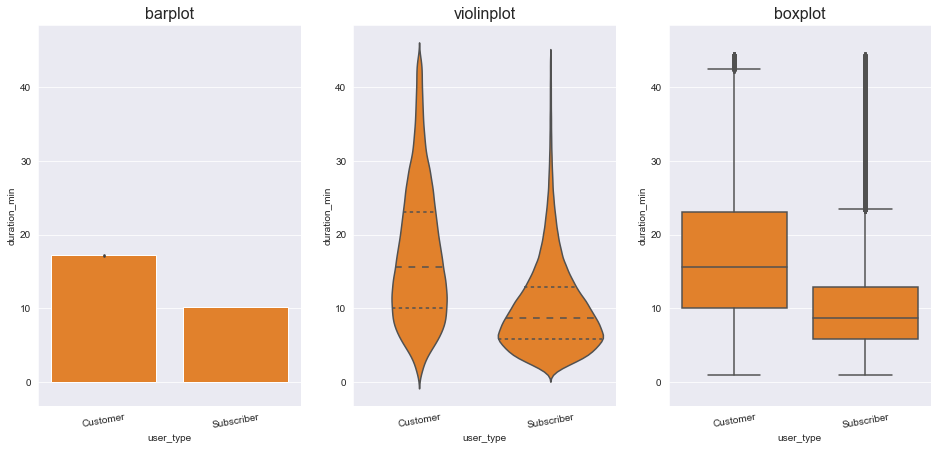

In [972]:
plt.figure(figsize = [16, 7])
base_color = sb.color_palette()[1]

# mid plot: violinplot
plt.subplot(1, 3, 2)
ax1 = sb.violinplot(data = main_new, x = 'user_type', y = 'duration_min', inner='quartile', color = base_color)       
            # by setting inner = 'quartile' in violin plot, three lines will be plotted within each violin area for the three middle quartiles. 
            # The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.
plt.xticks(rotation = 10)             # include label rotation due to small subplot size
plt.title('violinplot', fontsize=16)

# left plot: barplot
plt.subplot(1, 3, 1)
sb.barplot(data = main_new, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())              # set y-axis limits to be same as left plot
plt.title('barplot', fontsize=16);

# right plot: boxplot
plt.subplot(1, 3, 3)
sb.boxplot(data = main_new, x = 'user_type', y = 'duration_min', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())              # set y-axis limits to be same as left plot
plt.title('boxplot', fontsize=16);


- The barplot on the left shows that the average bike trip duration of Customers is almost the double of Subscribers (18 vs 10 minutes).

- The violinplot in the middle shows that the that third quartile of Subscribers (13 min) is even below the median of the Customers distribution (15 min).

- The boxplot on the right tells that for both user_types there are points above the higher whisker that indicate individual outlier points that are more than 1.5 times the IQR above the third quartile. Note: in paragraph 5.1 we sigma-clipped observations based on +/-  `5 * @sig`. If we would have clipped based on +/- `10 * @sig` the higher whisker would have been higher and then these outliers points would not have been outliers.


NOTE: The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). 
From the top and bottom of the box (of boxplot), the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. 



<br><br>
#### LET US COMPARE THE USAGE PROFILE OF user_types IN MORE DETAIL OVER THE months, day_of_week and hour_of_day:

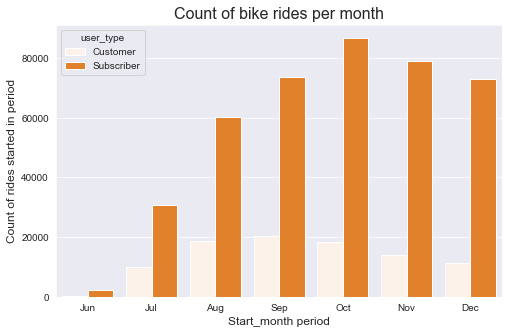

In [897]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

month_ranked = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month_ranked)
main_new['start_month'] = main_new['start_month'].astype(monthcat)

sb.countplot(data=main_new, x='start_month', hue='user_type', color=base_color)
plt.xlabel('Start_month period', fontsize=12)
plt.ylabel('Count of rides started in period', fontsize=12)
plt.title('Count of bike rides per month', fontsize=16);


- The bike rides of Customers have reached the top in September 2017 while Subscribers had top in November.



Let us now compare over the week:


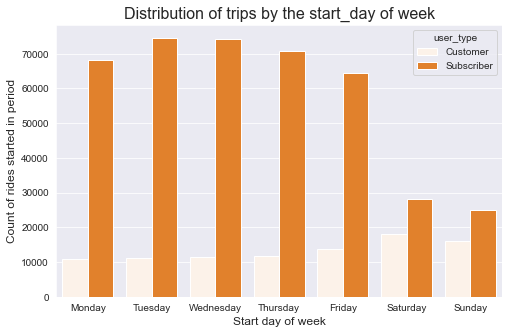

In [898]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
main_new['start_day_of_week'] = main_new['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=main_new, x='start_day_of_week', hue='user_type', color=base_color)
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Count of rides started in period', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


- Subscribers mainly hire a bike during weekdays (more than double), and Customers hire especially in the weekend.

Let us now look into the daily profile:

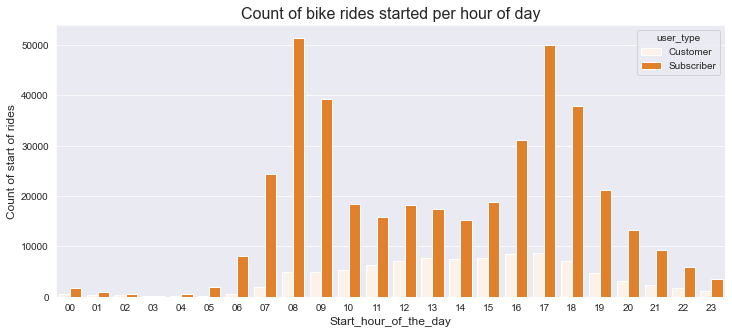

In [899]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[1]
sb.countplot(data=main_new, x='start_hour_of_day', hue='user_type', color=base_color)
plt.xlabel('Start_hour_of_the_day', fontsize=12)
plt.ylabel('Count of start of rides', fontsize=12)
plt.title('Count of bike rides started per hour of day', fontsize=16);


- Here we see that Customers have as busy hours for starting their bike trip after 11 and before 6 o'clock. So typically not between 8-9 o'clock in the morning which is a busy hour of the Subscribers. 

<br><br>
#### EXPLORE RELATIONSHIP BETWEEN trip duration (in minutes) AND TOP10 FAVORITE station_names

Finally let's look into the distribution of trips of the top destinations:

In [900]:
# determine index-object to be able to be present the faceted grid in descending order of success of destination
make_means = top_dest_df.groupby('end_station_name').count()
comb_order = make_means.sort_values('duration_sec', ascending = False).index

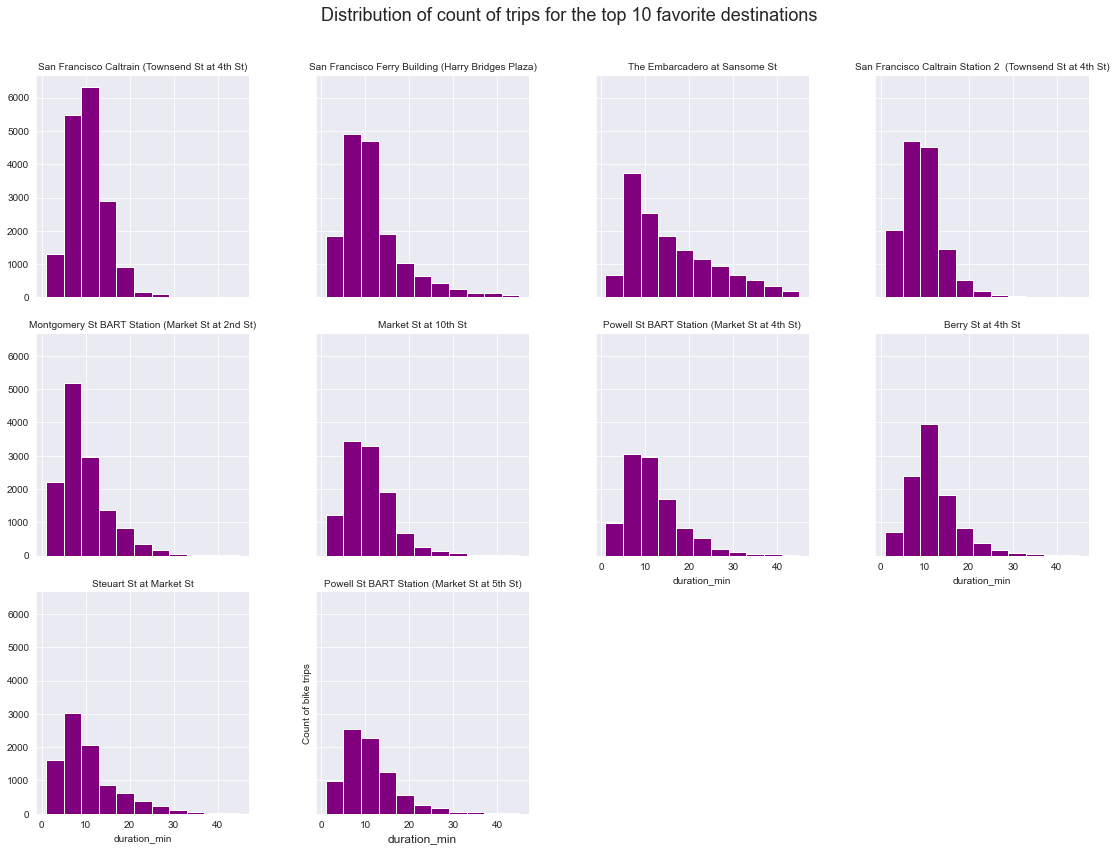

In [901]:
# plotting of distribution of count of trips to favorite destination

g = sb.FacetGrid(data = top_dest_df, col = 'end_station_name', col_wrap = 4, height = 4, col_order = comb_order, sharey=True)

g.map(plt.hist, 'duration_min', bins = np.arange(main_new['duration_min'].min(), main_new['duration_min'].max()+1, 4), color='purple')
plt.ylabel('Count of bike trips')
plt.xlabel('duration_min', fontsize=12)
g.set_titles('{col_name}');

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of count of trips for the top 10 favorite destinations', fontsize=18);

- We found that there is quite a difference in trip_duration to the top 10 destinations (station_name). 
- Eg the destination `The Embarcadero at Sansome St` seems to have largest tail to the right so has relatively long trip durations as destination.
- While a destination as ` San Francisco Calltrain` has relatively short trip duration to get there by bike.

<br><br>
#### Talk about some of the relationships you observed in this bivariate part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The barplot and violinplot show that the bike trip duration of Customers is about the double of Subscribers (20 vs 10 minutes).
- Subscribers mainly hire a bike during weekdays (more than double the level of weekdays), and Customers hire especially in the weekend.
- We found that Customers have as busy hours for starting their bike trip after 11 and before 6 o'clock (clearly bimodal distribution). So typically not at 8-9 o'clock in the morning which are the busy hours of the Subscribers for work related timing.


#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- We found that there is quite a difference in trip_duration to the top 10 destinations (station_name). Eg the destination `The Embarcadero at Saensome St` seems to have largest tail to the right so has relatively long trip durations to get there as destination.
- There seems to be an interesting relationship between the time taken to complete a trip and the starting hour. Probably an indication of traffic.
- Further it will be interesting to explore the relationship between the variables user_type, trip duration and station_name. For instance check whether large trip duration  time to a destination is (yes/no) related to user_type.



<br><br>
## 5.3 Multivariate Exploration

In this paragraph we create plots of three or more variables to investigate our data even further.

Here are some of the combinations we shall be exploring :
 1. user_type, start_month and trip duration in minutes (duration_min)
 2. user_type, start_day_of_week and trip duration in minutes
 3. user_type, start_hour_of_day and trip duration in minutes
 4. how the hourly usage varies during a week for Customers and Subscribers
 5. check distribution of trip duration over respectively start_day_of_week and top destination station
 
#### First we explore deeper the usage over the months:

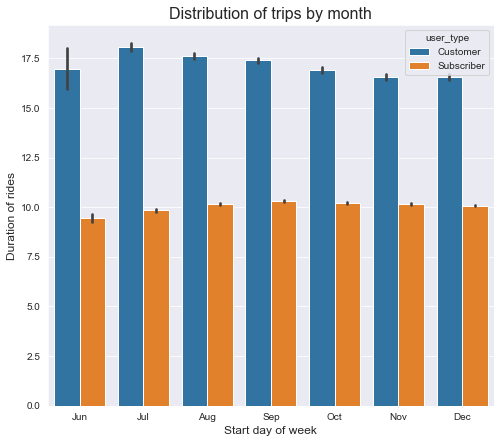

In [902]:
plt.figure(figsize=(8,7))
base_color = sb.color_palette()[1]

month_ranked = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month_ranked)
main_new['start_month'] = main_new['start_month'].astype(monthcat)

sb.barplot(data=main_new, x='start_month', y='duration_min', hue='user_type');

plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by month", fontsize=16);

- Plot above shows not a really significant change in trip duration over the months.

<br><br>
#### Secondly we check the trip duration profile over the days of the week:

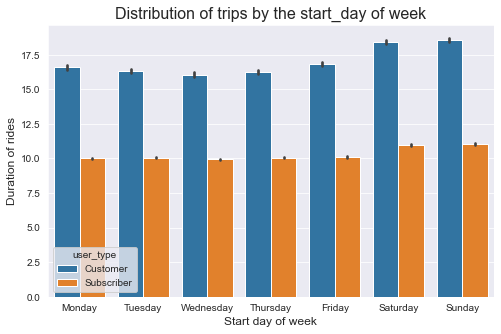

In [903]:
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
main_new['start_day_of_week'] = main_new['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=main_new, x='start_day_of_week', y='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


- The clustered barchart above shows a significant higher trip duration during weekend days by Customers. 
- The duration is about 18.5 minutes during weekend days, which is about 10% higher than the highest score during a weekday:

In [904]:
(18.57- 16.84) / 16.84

0.10273159144893114

In [905]:
main_new.groupby(['start_day_of_week', 'user_type']) ['duration_min'].mean()

start_day_of_week  user_type 
Monday             Customer      16.576809
                   Subscriber    10.016537
Tuesday            Customer      16.333386
                   Subscriber    10.053291
Wednesday          Customer      16.066634
                   Subscriber     9.939632
Thursday           Customer      16.231244
                   Subscriber    10.059139
Friday             Customer      16.842280
                   Subscriber    10.103521
Saturday           Customer      18.430175
                   Subscriber    10.964543
Sunday             Customer      18.570508
                   Subscriber    11.052707
Name: duration_min, dtype: float64

<br><br>
#### Thirdly we check the trip duration profile over the hours-of-the-day:

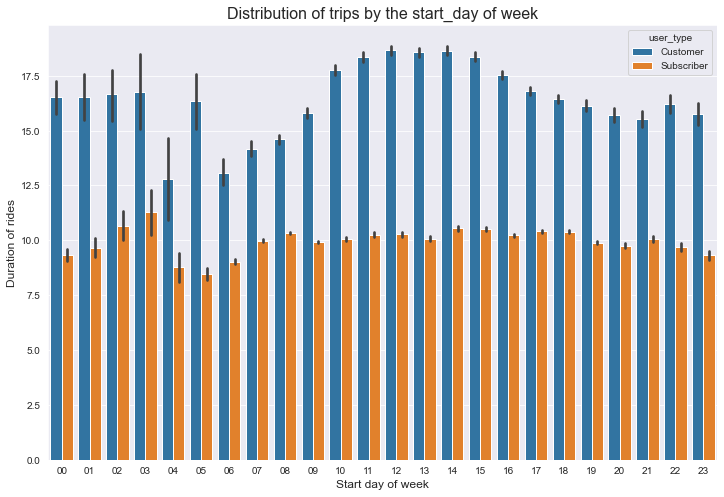

In [906]:
plt.figure(figsize=(12, 8))
base_color = sb.color_palette()[1]


sb.barplot(data=main_new, x='start_hour_of_day', y='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


- The trip duration has a dip between 6 and 9 o'clock, for both user_types. And is further quite stable.

#### Fourthly we analyse how the hourly usage varies during a week for Customers and Subscribers:

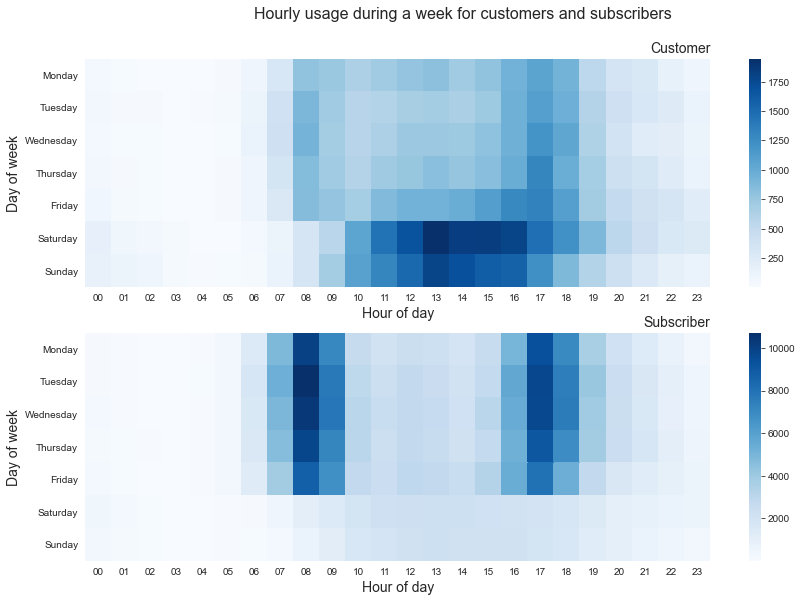

In [907]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = main_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = main_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour of day', fontsize=14);
plt.ylabel('Day of week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);

- It is interesting, that Customers tend to use the bike service mostly on Saturday/Sunday from 12 PM to 5 PM, while Subscribers will likely have a trip from Monday to Friday during rush hours (8-9 AM, 17-18 PM).

#### Finally we check distribution of trip duration over respectively start_day_of_week and top destination end_station_name:

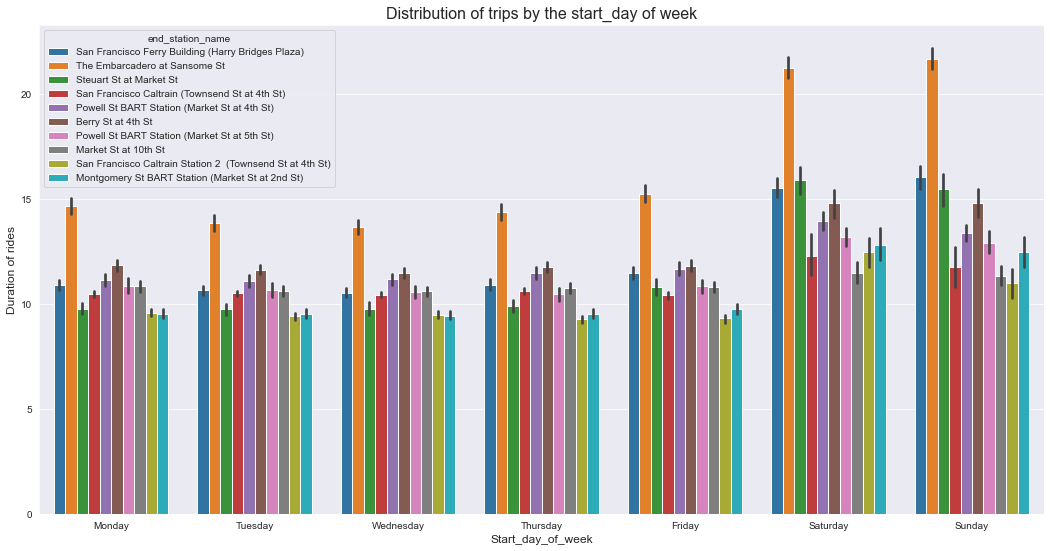

In [908]:
plt.figure(figsize=(18,9))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
top_dest_df['start_day_of_week'] = top_dest_df['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=top_dest_df, x='start_day_of_week', y='duration_min', hue='end_station_name')
plt.xlabel('Start_day_of_week', fontsize=12)
plt.ylabel('Duration of rides', fontsize=12)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


- We see that trip_duration is about the same except for the destination `The Embarcadero at Sansome St` (about 30-40% higher). This has probably a relation with the surrounding area (SF Bay leisure areas) and longer corresponding trip distances.


- And here we see that the long trip duration to `The Embarcadero at Sansome St` is mainly caused by the user_type 'Customers' which has an outlying trip durution towards that location:

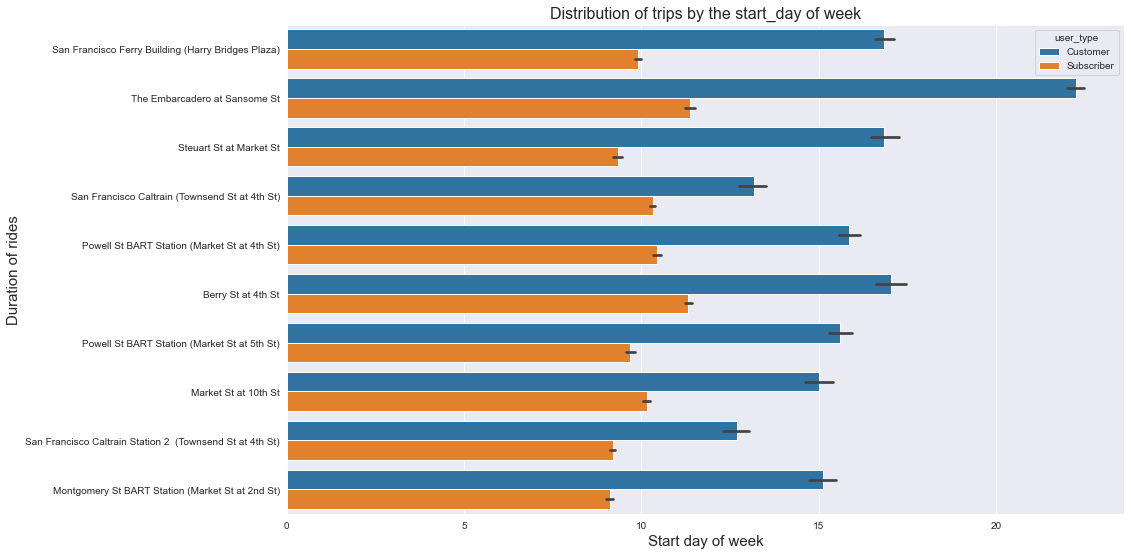

In [909]:
plt.figure(figsize=(15,9))
base_color = sb.color_palette()[1]

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
top_dest_df['start_day_of_week'] = top_dest_df['start_day_of_week'].astype(weekdaycat)

sb.barplot(data=top_dest_df, y='end_station_name', x='duration_min', hue='user_type')
plt.xlabel('Start day of week', fontsize=15)
plt.ylabel('Duration of rides', fontsize=15)
plt.title("Distribution of trips by the start_day of week", fontsize=16);


If you check the location `The Embarcadero at Sansome St` you see that the station is really in the middle of a great tourist/recreation area which ... can make you understand why the bike trips by Customers take long... :)

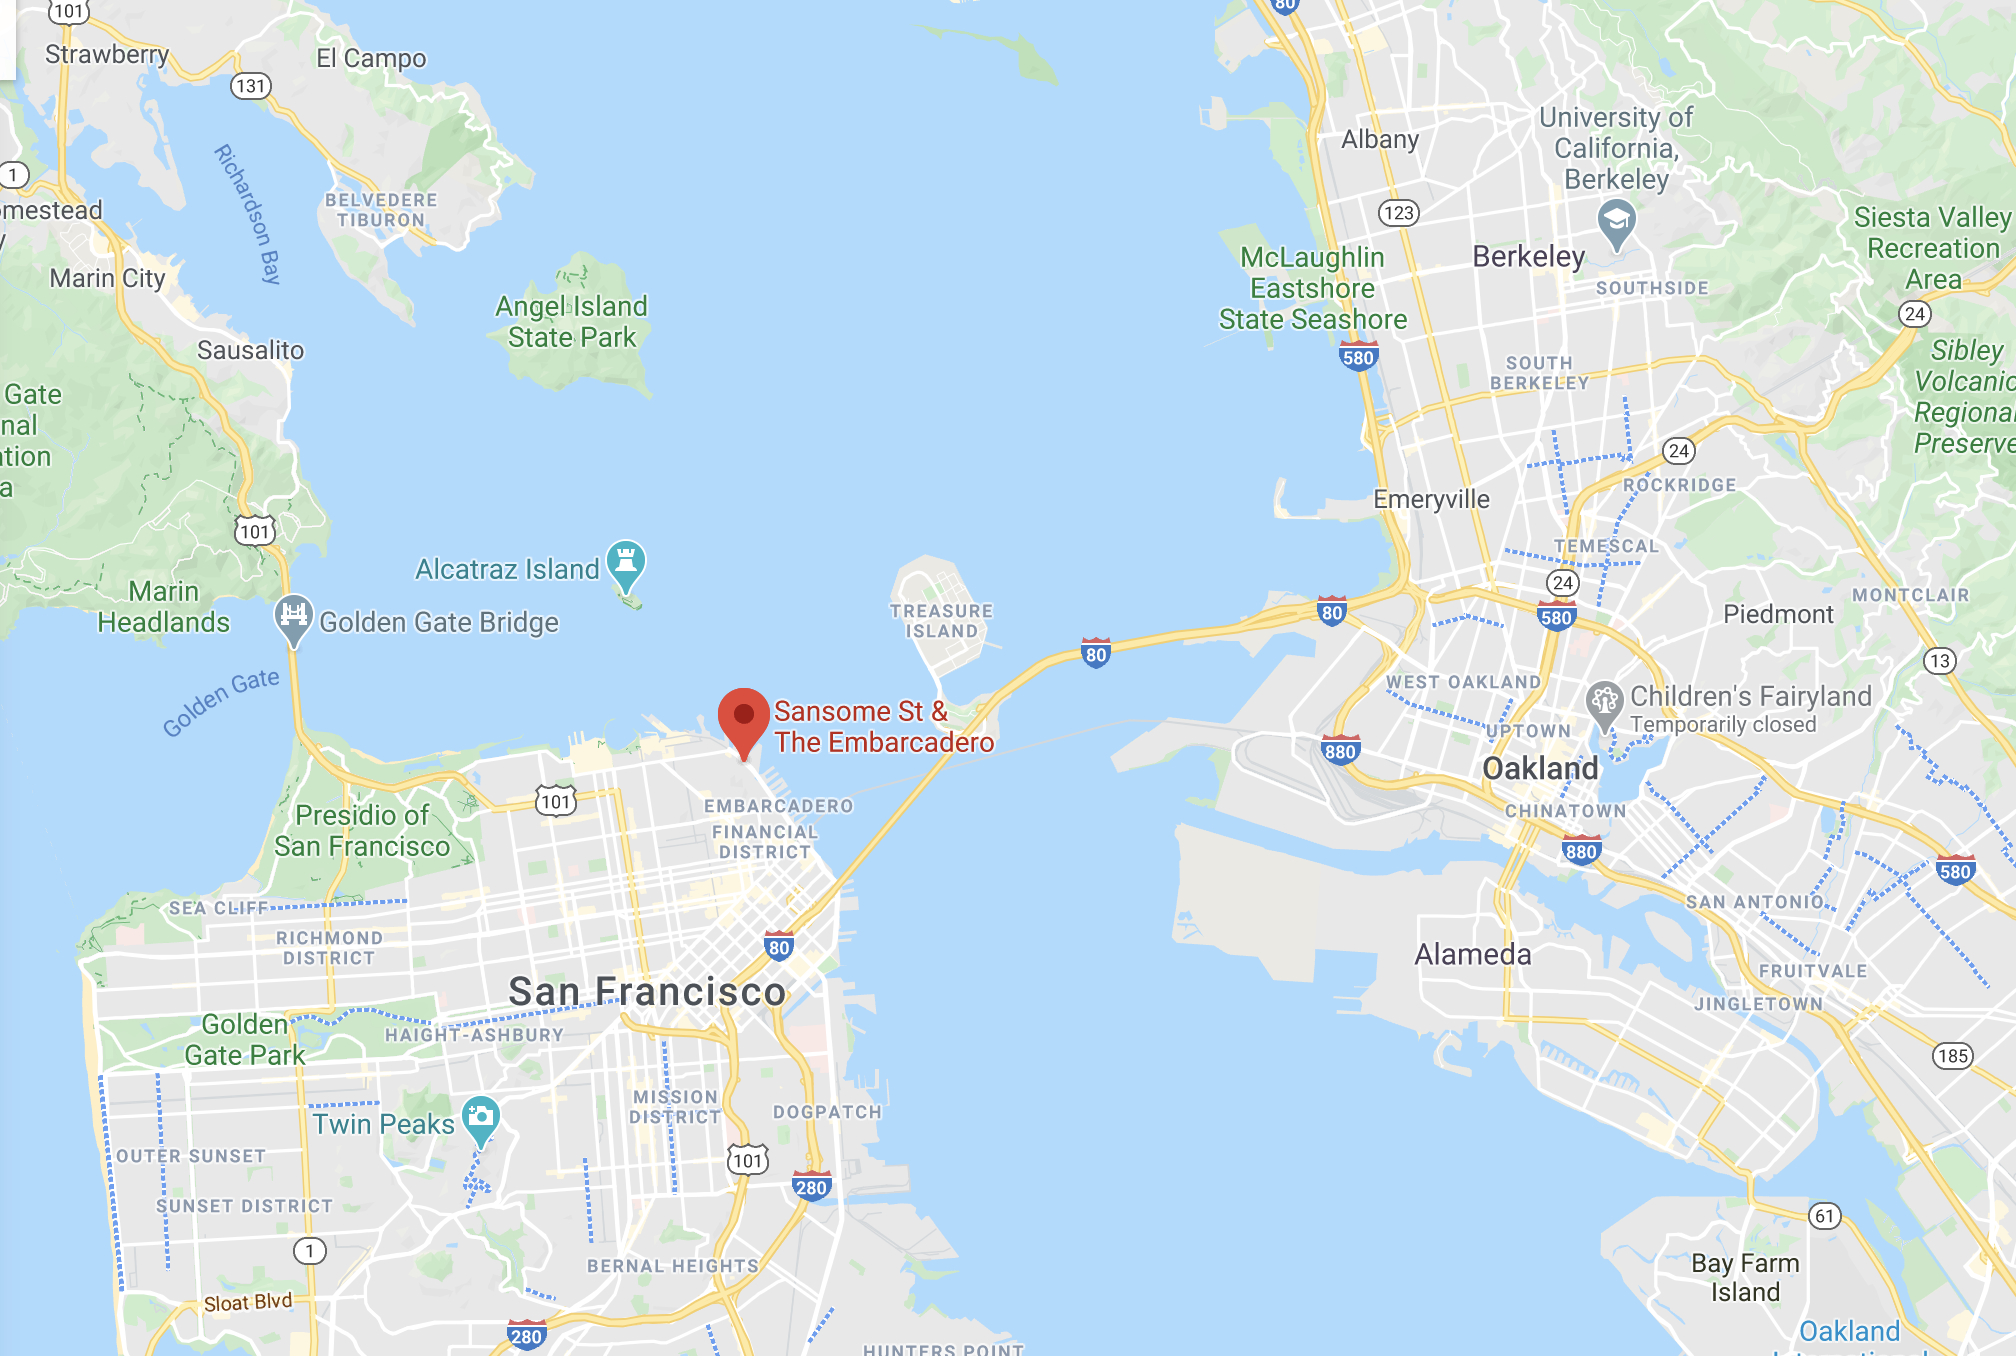

In [910]:
from IPython.display import Image
Image(filename='Embarcadero.png') 

<br><br>
# 6. Conclusions

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Definitely each of these graphs reinforces the general hypothesis that customers are more like recreational users and subcribers tend to be people that use them to go to work or school:
  - Subscribers mainly hire a bike during weekdays (more than double the level of weekdays), and Customers hire especially in the weekend.
  - The bike trip duration of Customers is about the double of Subscribers (18 vs 10 minutes).
  - A significant higher trip duration during weekend days by Customers. The duration is about 18.5 minutes during weekend days, which is about 10% higher than the highest score during a weekday.
- But the last (multivariate explorations) help us get even more detail about the patterns of use on hourly level over the whole course of a week, and the differences between Customers and Subcribers.
  - For both types of users the distribution of rides during the weekdays depends a lot on the hour of the day and day of the week. 
  - It is interesting, that Customers tend to use the bike service mostly on Saturday/Sunday from 12 PM to 5 PM, while Subscribers will likely have a trip from Monday to Friday during rush hours (8-9 AM, 17-18 PM).

#### Were there any interesting or surprising interactions between features?

- The trip duration has a dip between 6 and 9 o'clock, for both user_types. 
- Also location of end destination station matters as variable for predicting bike usage; the destination `The Embarcadero at Sansome St` has the highest trip duration (about 30-40% higher) compared with other destinations. This has probably a relation with that the station is located at a great tourist/recreation area which ... can make you understand why the bike trips by Customers take long... :)